In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

In [2]:
masks = glob.glob("../media/alle_hekken/masks/*.png")
orgs = glob.glob("../media/alle_hekken/images/*.png")

In [3]:
imgs_list = []
masks_list = []

for image, mask in zip(orgs, masks):
    i_np = np.array(Image.open(image).resize((384,384)))
    imgs_list.append(i_np)
    m_np = np.array(Image.open(mask).resize((384,384)))
    if m_np.shape != (384, 384):
        m_np = np.delete(m_np, np.s_[:2], 2)
        m_np = np.reshape(m_np, (384, 384))
    masks_list.append(m_np)
    
    
imgs_np = np.array(imgs_list)
masks_np = np.array(masks_list)

In [4]:
x = np.asarray(imgs_list, dtype=np.float32)/255

In [5]:
y = np.asarray(masks_list, dtype=np.float32)

In [6]:
x.shape, y.shape, imgs_np.max()

((1219, 384, 384, 3), (1219, 384, 384), 255)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.9, random_state=0)


print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (121, 384, 384, 3)
y_train:  (121, 384, 384)
x_val:  (1098, 384, 384, 3)
y_val:  (1098, 384, 384)


In [8]:
for i in y_val:
    if i.shape != (384, 384, 3):
        print(' ffffffff')

 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff
 ffffffff


In [9]:
x_val[0].shape

(384, 384, 3)

In [10]:

from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=x_train[0].shape,
    filters=32,
    use_batch_norm=True,
    dropout=0.3,
    dropout_change_per_layer=0.0,
    num_layers=4
)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:

from keras.callbacks import ModelCheckpoint


model_filename = 'segm_model_v3.h5'
callback_checkpoint = ModelCheckpoint(
    model_filename, 
    verbose=1, 
    monitor='val_loss', 
    save_best_only=True,
)

In [12]:
from keras.optimizers import Adam, SGD
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

model.compile(
#     optimizer=Adam(), 
    optimizer=SGD(lr=0.01, momentum=0.99),
#     loss='binary_crossentropy',
    loss=jaccard_distance,
    metrics=[iou, iou_thresholded]
)

In [13]:
x_val.shape

(1098, 384, 384, 3)

In [18]:

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=[callback_checkpoint]
)

Epoch 1/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.8001e-05 - iou_thresholded: 1.8001e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00001: val_loss did not improve from 5.04502
Epoch 2/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.1324e-05 - iou_thresholded: 1.1324e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00002: val_loss did not improve from 5.04502
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.2283e-05 - iou_thresholded: 1.2283e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00003: val_loss did not improve from 5.04502
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.1341e-05 - iou_thresholded: 1.1341e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00004: val_loss did not improve from 

8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 2.6558e-05 - iou_thresholded: 2.6558e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00033: val_loss did not improve from 5.04502
Epoch 34/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.2454e-05 - iou_thresholded: 1.2454e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00034: val_loss did not improve from 5.04502
Epoch 35/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.0929e-05 - iou_thresholded: 1.0929e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00035: val_loss did not improve from 5.04502
Epoch 36/50
8/8 [==============================] - 17s 2s/step - loss: 4.9016 - iou: 1.2372e-05 - iou_thresholded: 1.2372e-05 - val_loss: 5.0450 - val_iou: 1.3072e-05 - val_iou_thresholded: 1.3072e-05

Epoch 00036: val_loss did not improve from 5.04502


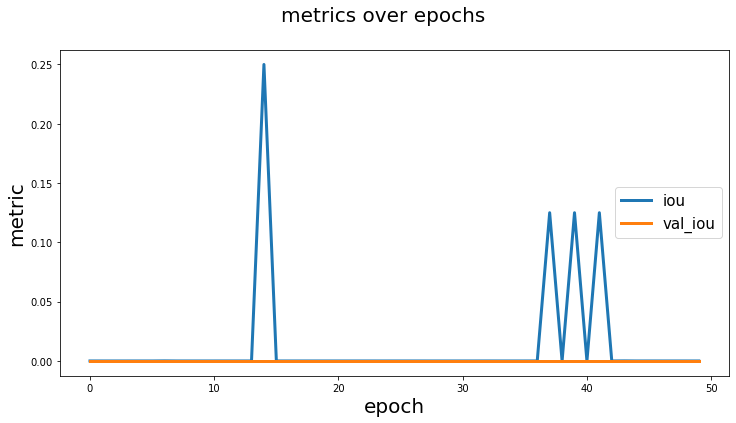

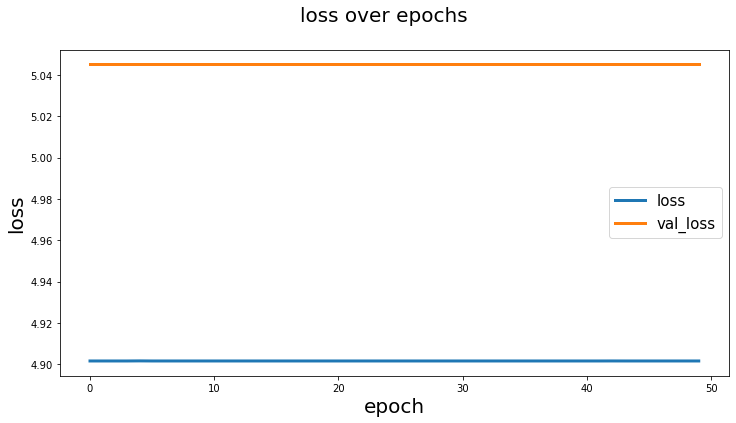

In [19]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)